In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
train = pd.read_csv(r"C:\Users\Ishan N Vaidya\Downloads\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"C:\Users\Ishan N Vaidya\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [3]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
target = ["SalePrice"]

In [6]:
X= train[features]
y= train[target]

In [7]:
X.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64

In [8]:
X = X.fillna(X.median())

In [9]:
X_test = test[features]
X_test = X_test.fillna(X_test.median())

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 52975.71771337445
R² Score: 0.6341189942329306


In [15]:
test_predictions = model.predict(X_test_scaled)

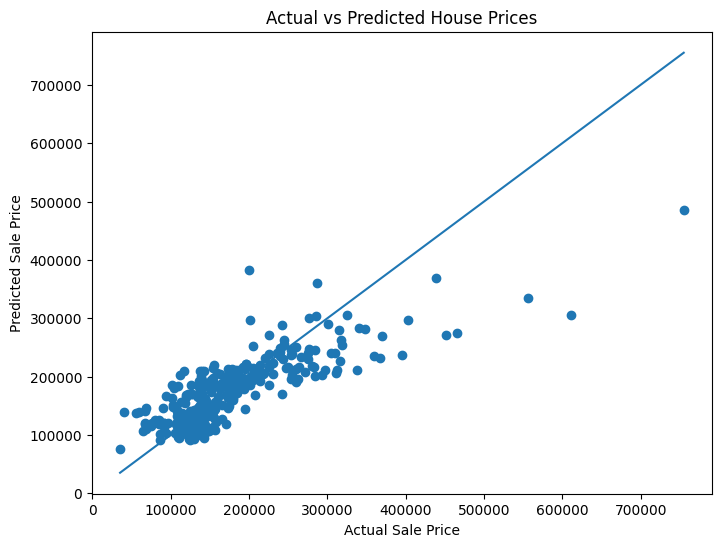

In [20]:
y_pred = model.predict(X_val)

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()])
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

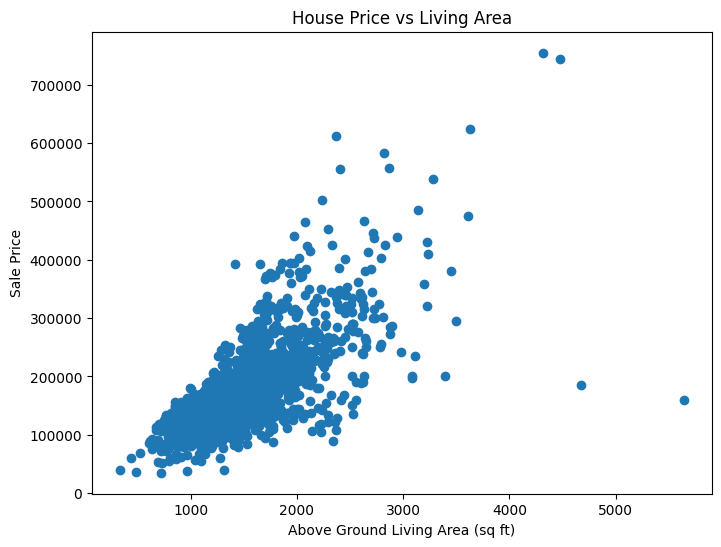

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.title("House Price vs Living Area")
plt.show()